In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [47]:
def convert_year(val):
    try:
        return int(val)
    except:
        # IF THERE'S ANY ERROR OR NULL SIMPLY SET IT TO 1970
        return 1970.00

In [48]:
def parse_reviews(review):
    return float(review.split(" ")[0])

In [49]:
def fit_transform(enc, values):
    try:
        encs = list(enc.classes_)
    except:
        encs = list(values)
    for value in values:
        if (value not in encs):
            encs.append(value)
    enc.fit_transform(encs)
    return enc

In [50]:
def parse_price(price):
    if price <= 6000:
        return price
    else:
        return None

In [51]:
auth_enc = LabelEncoder()
cover_enc = LabelEncoder()

rating_scaler = StandardScaler()
review_scaler = StandardScaler()
price_scaler = StandardScaler()

def parse_dataset(df, is_transformable = True, is_test = False):
    df["Ratings"] = df.Ratings.map(lambda d: int(d.split(" ")[0].replace(",", "")))
    df["CoverType"] = df.Edition.map(lambda d: d.split(",")[0])
    df["Year"] = df.Edition.map(lambda d: convert_year(d[-4:]))
    df["Reviews"] = df.Reviews.map(lambda d: parse_reviews(d))
    df["Price"] = df.Price.map(lambda d: parse_price(d))
    if (not is_test):
        df = df.dropna()
        df.reset_index(drop=True)

    global auth_enc
    global cover_enc
    global syno_enc
    global title_enc
    global gen_enc
    
    global rating_scaler
    global review_scaler
    global price_scaler
    
    auth_enc = fit_transform(auth_enc, df.Author)
    cover_enc = fit_transform(cover_enc, df.CoverType)
       
    if is_transformable:
        df["Author"] = auth_enc.transform(df.Author)
        df["CoverType"] = cover_enc.transform(df.CoverType)
        df["Synopsis"] = syno_enc.transform(df.Synopsis)
        df["Title"] = title_enc.transform(df.Title)
        df["Genre"] = gen_enc.transform(df.Genre)
        
        df["Ratings"] = rating_scaler.fit_transform(np.array(df.Ratings).reshape(-1, 1))
        df["Reviews"] = review_scaler.fit_transform(np.array(df.Reviews).reshape(-1, 1))
        df["Price"] = price_scaler.fit_transform(np.array(df.Price).reshape(-1, 1))


    return pd.concat([df.Author, df.CoverType, df.Reviews, df.Year, df.Ratings, df.Price], axis=1)



In [52]:
train_df = pd.concat([pd.read_csv("Data_Train.csv")], axis=0)
pds = parse_dataset(train_df, True)

<ipython-input-51-c30e8b45cece>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Author"] = auth_enc.transform(df.Author)
<ipython-input-51-c30e8b45cece>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["CoverType"] = cover_enc.transform(df.CoverType)
<ipython-input-51-c30e8b45cece>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pa

In [53]:
pds.head()

,Author,CoverType,Reviews,Year,Ratings,Price
0,615,12,-0.441415,2016.0,-0.186813,-0.569267
1,307,12,-0.592328,2012.0,-0.146845,-0.599232
2,3385,12,0.765883,1982.0,-0.200135,-0.430588
3,62,12,-0.290503,2017.0,-0.153506,-0.639484
4,952,7,1.067707,2006.0,-0.233442,0.739618


In [54]:
from scipy.stats import skew,kurtosis,zscore
def distribution_check(df,Cols):
    plt.figure(figsize=(25,7))
    fig = 1
    i = (len(Cols)//3)+1
    for col in Cols:
        sk = " Skewness : " + str(skew(df[col])) +"\nKurtosis :" + str(kurtosis(df[col]))
        plt.subplot(i, 3, fig)
        sns.distplot(df[col]).set_title(sk)
        fig = fig+1

C:\Users\muhammad.hani\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\muhammad.hani\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\muhammad.hani\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5

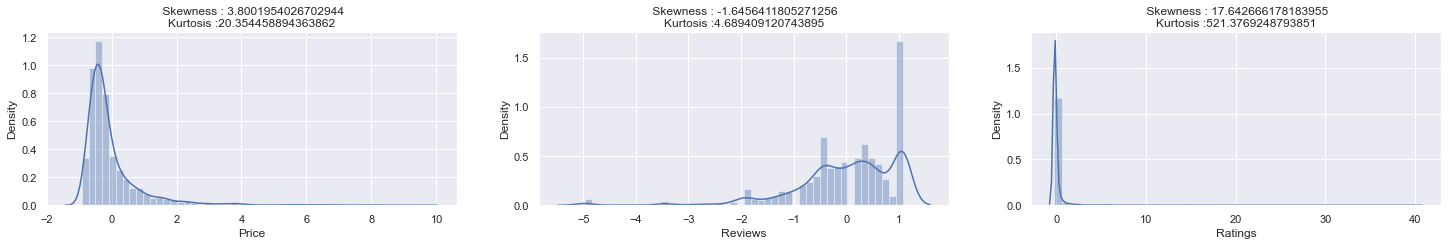

In [55]:
distribution_check(pds,['Price','Reviews','Ratings'])

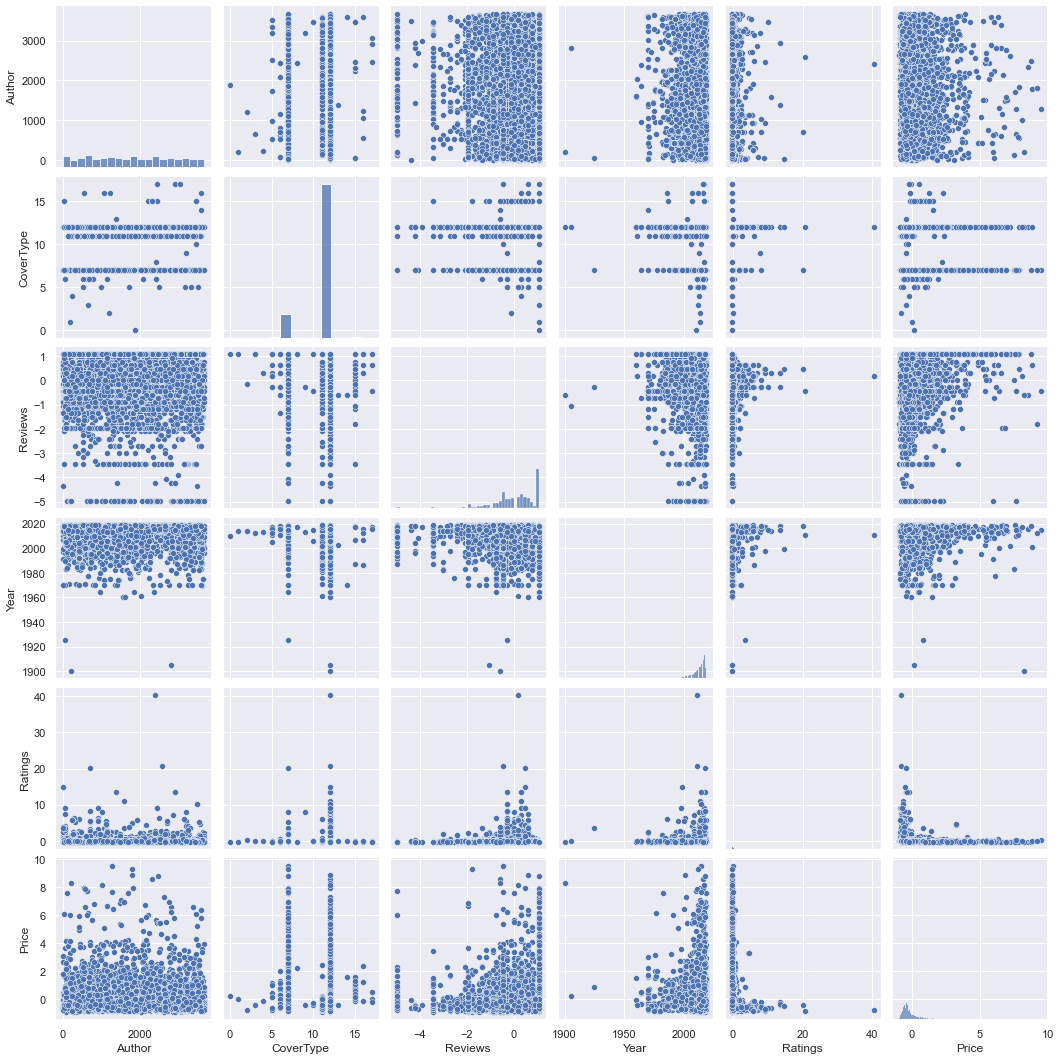

In [56]:
sns.pairplot(pds)

In [58]:
test_df = pd.read_csv("Data_Test.csv")
test_df["Price"] = pd.read_csv("Sample_Submission.csv")

In [59]:
test_data = parse_dataset(test_df, True, True)

In [60]:
test_data.head()

,Author,CoverType,Reviews,Year,Ratings,Price
0,3764,12,0.140223,1986.0,5.629529,-0.372643
1,1301,13,1.039184,2018.0,-0.198531,-0.099978
2,887,13,1.039184,2011.0,-0.180299,-1.122475
3,166,13,-0.309258,2016.0,-0.137758,-0.440810
4,3259,13,0.140223,2011.0,-0.149913,0.513521


In [61]:
inputs = pds.iloc[:, :-1]
target = pds.iloc[:,-1:]["Price"]

In [62]:
test_inputs = test_data.iloc[:, :-1]
test_target = test_data.iloc[:,-1:]["Price"]

In [63]:
test_inputs.head()

,Author,CoverType,Reviews,Year,Ratings
0,3764,12,0.140223,1986.0,5.629529
1,1301,13,1.039184,2018.0,-0.198531
2,887,13,1.039184,2011.0,-0.180299
3,166,13,-0.309258,2016.0,-0.137758
4,3259,13,0.140223,2011.0,-0.149913


In [64]:
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import KFold, cross_val_score

In [71]:
model = GradientBoostingRegressor()
model.fit(inputs, target)

GradientBoostingRegressor()

In [72]:
1 - np.sqrt(np.square(np.log10(price_scaler.inverse_transform(np.array(model.predict(inputs)).reshape(-1, 1)) +1) - np.log10(price_scaler.inverse_transform(np.array(target).reshape(-1 ,1)) +1)).mean())

0.9631124094766514

In [73]:
1 - np.sqrt(np.square(np.log10(price_scaler.inverse_transform(np.array(model.predict(test_inputs)).reshape(-1, 1)) +1) - np.log10(price_scaler.inverse_transform(np.array(test_target).reshape(-1 ,1)) +1)).mean())

0.9457882892143453

In [75]:
submission = pd.DataFrame(columns=["Price"], data=price_scaler.inverse_transform(np.array(model.predict(test_inputs)).reshape(-1, 1)))

In [76]:
submission.head()

,Price
0,118.410536
1,123.751563
2,126.819885
3,121.414736
4,121.410149


In [79]:
submission["Actual Price"] = price_scaler.inverse_transform(np.array(test_df.Price).reshape(-1, 1))

In [80]:
submission

,Price,Actual Price
0,118.410536,119.0
1,123.751563,123.0
2,126.819885,108.0
3,121.414736,118.0
4,121.410149,132.0
...,...,...
1555,127.009934,104.0
1556,119.052362,114.0
1557,122.311848,131.0
1558,122.379967,106.0


In [81]:
submission["Diff"] = submission["Actual Price"] - submission.Price

In [83]:
submission.head()

,Price,Actual Price,Diff
0,118.410536,119.0,0.589464
1,123.751563,123.0,-0.751563
2,126.819885,108.0,-18.819885
3,121.414736,118.0,-3.414736
4,121.410149,132.0,10.589851


In [85]:
submission.describe()

,Price,Actual Price,Diff
count,1560.000000,1560.000000,1560.000000
mean,124.242623,124.466667,0.224044
std,5.549644,14.674669,15.624246
min,114.963571,100.000000,-48.048321
25%,120.683621,112.000000,-12.308297
50%,122.698537,124.000000,0.194119
75%,126.480045,137.000000,13.158152
max,155.546452,149.000000,31.436613


In [92]:
submission["Accuracy %"] = (submission.Price/ submission["Actual Price"]) * 100

In [93]:
submission

,Price,Actual Price,Diff,Diff%,Accuracy %
0,118.410536,119.0,0.589464,99.504652,99.504652
1,123.751563,123.0,-0.751563,100.611027,100.611027
2,126.819885,108.0,-18.819885,117.425820,117.425820
3,121.414736,118.0,-3.414736,102.893844,102.893844
4,121.410149,132.0,10.589851,91.977386,91.977386
...,...,...,...,...,...
1555,127.009934,104.0,-23.009934,122.124937,122.124937
1556,119.052362,114.0,-5.052362,104.431897,104.431897
1557,122.311848,131.0,8.688152,93.367823,93.367823
1558,122.379967,106.0,-16.379967,115.452799,115.452799
